<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            97 non-null     datetime64[ns]
 1   country         97 non-null     object        
 2   City            97 non-null     object        
 3   Region          97 non-null     object        
 4   Manager         97 non-null     object        
 5   SalesMan        97 non-null     object        
 6   customer_names  97 non-null     object        
 7   Item            97 non-null     object        
 8   Quantity        97 non-null     int64         
 9   Price           97 non-null     float64       
 10  Sales           97 non-null     float64       
 11  Sales per Unit  97 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 9.2+ KB


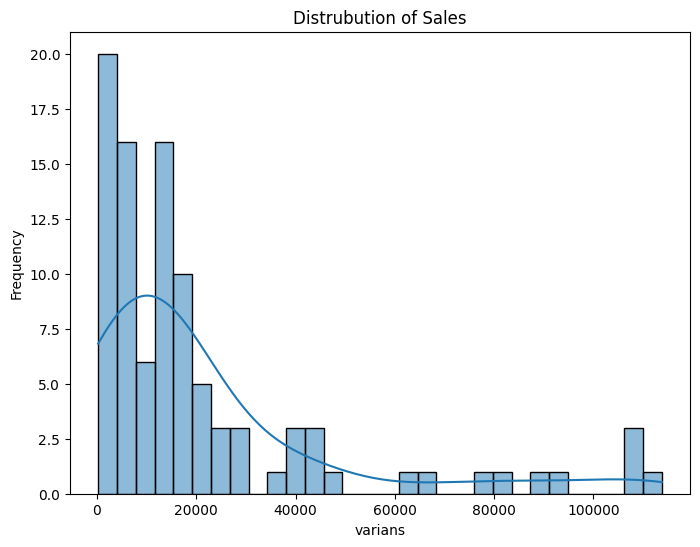

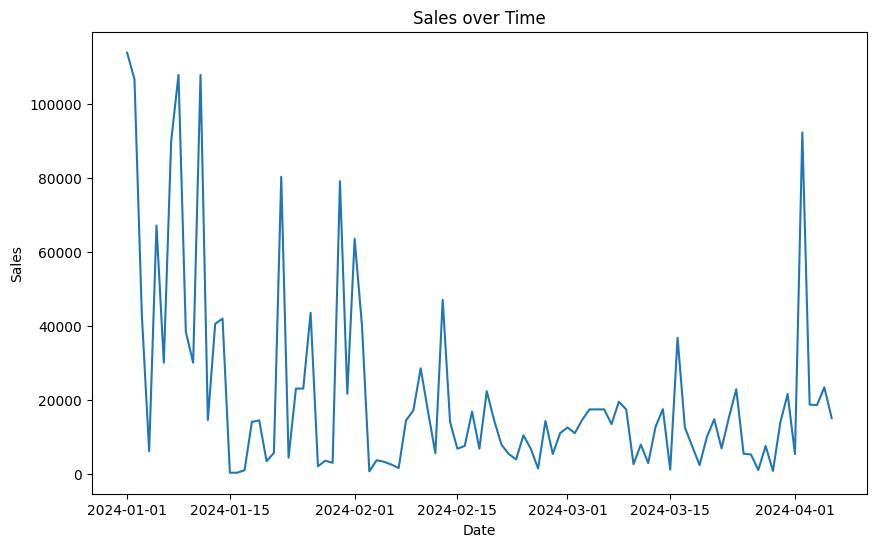

In [63]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the excel file
df = pd.read_excel('salesdata.xlsx')

# Calculate the average price per unit for each item
avg_price_per_unit = df.groupby('Item')['Price'].mean()

# Join the 'Units' and 'Price' columns to calculate total sales
df['Sales'] = df['Quantity'] * df['Price']

# Create a new column for sales per unit
df['Sales per Unit'] = df['Quantity'] / df['Sales']

# Calculate the total sales for each item
total_sales_by_item = df.groupby('Item')['Sales'].sum()

# Calculate the standard deviation of sales for each region
std_sales_by_region = df.groupby('Region')['Sales'].std()

# Find the maximum sales for each manager
max_sales_by_manager = df.groupby('Manager')['Sales'].max()

# Display the first few rows
df.head()

# Display summary information about the dataset
df.info()

# Display summary statistics about the dataset
df.describe()

# Perform basic data cleaning
df['Sales']

# Remove duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Visualize the distribution 
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distrubution of Sales')
plt.xlabel('varians')
plt.ylabel('Frequency')
plt.show()

# Visualize sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=df)
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
df.to_excel('cleaned_sales_data.xlsx', index=False)